<table style="width:100%">
  <tr>
    <th align="center">
    <h1 align="center">Laboratorio 3</h1>
    <h2 align="center">Estadistica Computacional</h2>
    <h3 align="center">Diego Zamora 201473076-4</h3>
    <h3 align="center">Juan Pablo León 201473047-0</h3>
    </th> 
  </tr>

# 1.- Distribuciones Discretas

In [2]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import pandas as pd
import scipy.misc
import scipy.special
import math

1.- ¿Por qué es posible aproximar una distribución discreta con una distribución continua? 

La respuesta está en que podemos entender una distribución continua como una distribución discreta pero que cuyo tamaño de muestra $n$ tiende a infinito, por lo que al ir aumentando el n en una distribución discreta es posible que esta pueda asemejarse a una distribución continua ya conocida. Cabe destacar que existe un valor de error, lo que es común cuando se habla de aproximaciones, y que también hay que hacer un pequeño ajuste al cambio $z$ para reflejarlo, en el caso de pasar de una binomial a una normal el cambio en el $z$ es: $$z = \frac{(x \pm 0.5) - \mu}{\sigma}$$

2.- Demostraremos como las aproximaciones se cumplen, generando muestras de la distribución binomial con parámetros fijos ($n$ y $p$) y comparándo los histogramas de estas muestras con las respectivas funciones teóricas.


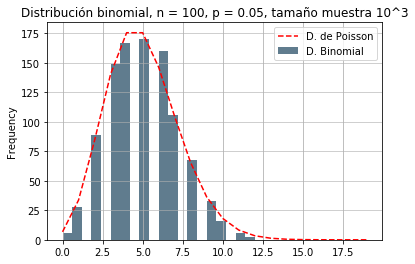

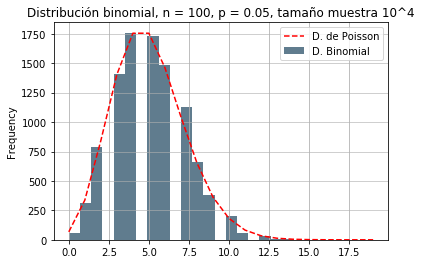

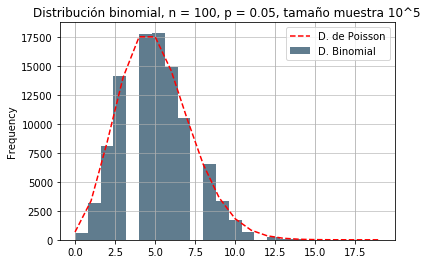

In [258]:
# Primera aproximación a Poisson
# n = 100; p = 0.05

np.random.seed(300)

n = 100
p = 0.05
lambd = n * p

def Poisson1(x):
    return (math.e**(-lambd) * lambd**t / scipy.special.factorial(t))

muestra1 = np.random.binomial(n, p, 10**3)
muestra2 = np.random.binomial(n, p, 10**4)
muestra3 = np.random.binomial(n, p, 10**5)

hist1 = pd.Series(muestra1)
hist2 = pd.Series(muestra2)
hist3 = pd.Series(muestra3)

t = np.arange(0., 20., 1.)

plt.figure(1)
hist1.plot.hist(grid=True, bins=20, rwidth=1, color='#607c8e', label="D. Binomial")
plt.title('Distribución binomial, n = 100, p = 0.05, tamaño muestra 10^3')
plt.grid(axis='y', alpha=0.75)
plt.plot(t, Poisson1(t)*10**3, 'r--', label="D. de Poisson")
plt.legend()
plt.show()

plt.figure(2)
hist2.plot.hist(grid=True, bins=20, rwidth=1, color='#607c8e', label="D. Binomial")
plt.title('Distribución binomial, n = 100, p = 0.05, tamaño muestra 10^4')
plt.grid(axis='y', alpha=0.75)
plt.plot(t, Poisson1(t)*10**4, 'r--', label="D. de Poisson")
plt.legend()
plt.show()

plt.figure(3)
hist3.plot.hist(grid=True, bins=20, rwidth=1, color='#607c8e', label="D. Binomial")
plt.title('Distribución binomial, n = 100, p = 0.05, tamaño muestra 10^5')
plt.grid(axis='y', alpha=0.75)
plt.plot(t, Poisson1(t)*10**5, 'r--', label="D. de Poisson")
plt.legend()
plt.show()

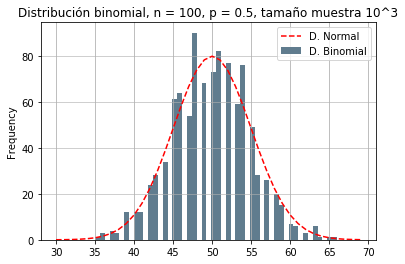

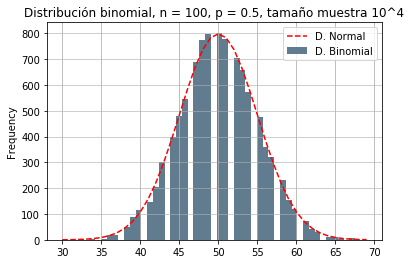

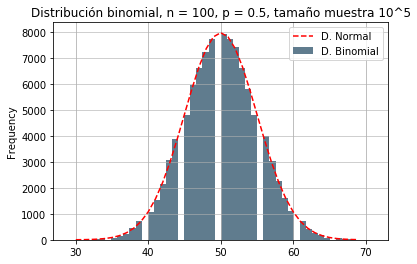

In [257]:
# Aproximación a la Normal
# n = 100, p = 0.5

n = 100
p = 0.5
mu = n * p
sigma = np.sqrt(n*p*(1-p))

def Normal(x):
    return 1/np.sqrt(2*np.pi*sigma**2) * math.e**(-(x-mu)**2/(2*sigma**2))

muestra4 = np.random.binomial(n, p, 10**3)
muestra5 = np.random.binomial(n, p, 10**4)
muestra6 = np.random.binomial(n, p, 10**5)

hist4 = pd.Series(muestra4)
hist5 = pd.Series(muestra5)
hist6 = pd.Series(muestra6)

t = np.arange(30., 70., 1.)

plt.figure(4)
hist4.plot.hist(grid=True, bins=50, rwidth=1, color='#607c8e', label="D. Binomial")
plt.title('Distribución binomial, n = 100, p = 0.5, tamaño muestra 10^3')
plt.grid(axis='y', alpha=0.75)
plt.plot(t, Normal(t)*10**3, 'r--', label="D. Normal")
plt.legend()
plt.show()

plt.figure(5)
hist5.plot.hist(grid=True, bins=50, rwidth=1, color='#607c8e', label="D. Binomial")
plt.title('Distribución binomial, n = 100, p = 0.5, tamaño muestra 10^4')
plt.grid(axis='y', alpha=0.75)
plt.plot(t, Normal(t)*10**4, 'r--', label="D. Normal")
plt.legend()
plt.show()

plt.figure(6)
hist6.plot.hist(grid=True, bins=50, rwidth=1, color='#607c8e', label="D. Binomial")
plt.title('Distribución binomial, n = 100, p = 0.5, tamaño muestra 10^5')
plt.grid(axis='y', alpha=0.75)
plt.plot(t, Normal(t)*10**5, 'r--', label="D. Normal")
plt.legend()
plt.show()


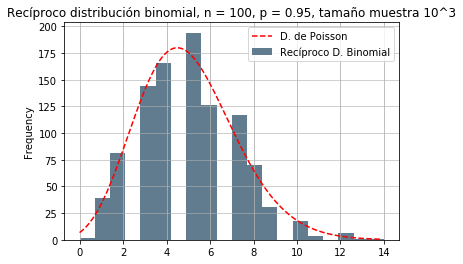

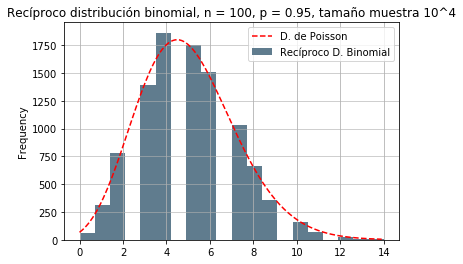

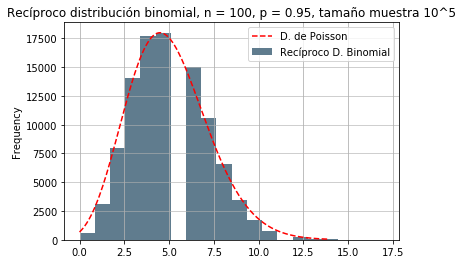

In [255]:
# Segunda aproximación a la Poisson
# n = 100, p = 0.95

n = 100
p = 0.95
lambd = n * (1 - p)

def Poisson2(x):
    return (math.e**(-lambd) * lambd**t / scipy.special.factorial(t))

muestra7 = np.random.binomial(n, 1-p, 10**3)
muestra8 = np.random.binomial(n, 1-p, 10**4)
muestra9 = np.random.binomial(n, 1-p, 10**5)

hist7 = pd.Series(muestra7)
hist8 = pd.Series(muestra8)
hist9 = pd.Series(muestra9)

t = np.arange(0., 14, 0.1)

plt.figure(7)
hist7.plot.hist(grid=True, bins=20, rwidth=1, color='#607c8e', label="Recíproco D. Binomial")
plt.title('Recíproco distribución binomial, n = 100, p = 0.95, tamaño muestra 10^3')
plt.grid(axis='y', alpha=0.75)
plt.plot(t, Poisson2(t)*10**3, 'r--', label="D. de Poisson")
plt.legend()
plt.show()

plt.figure(8)
hist8.plot.hist(grid=True, bins=20, rwidth=1, color='#607c8e', label="Recíproco D. Binomial")
plt.title('Recíproco distribución binomial, n = 100, p = 0.95, tamaño muestra 10^4')
plt.grid(axis='y', alpha=0.75)
plt.plot(t, Poisson2(t)*10**4, 'r--', label="D. de Poisson")
plt.legend()
plt.show()

plt.figure(9)
hist9.plot.hist(grid=True, bins=20, rwidth=1, color='#607c8e', label="Recíproco D. Binomial")
plt.title('Recíproco distribución binomial, n = 100, p = 0.95, tamaño muestra 10^5')
plt.grid(axis='y', alpha=0.75)
plt.plot(t, Poisson2(t)*10**5, 'r--', label="D. de Poisson")
plt.legend()
plt.show()

3.- Finalmente, veremos que el valor de $n$ tiene relación con el error de aproximación para un $p$ fijo. Utilizaremos un $p=0.5$ y evaluaremos para valores de $n \in \{10, ..., 45\}$, por lo que aproximaremos a la distribución normal. 

[1.00315217e+07 1.82391303e+07 2.96385867e+07 4.33179344e+07
 5.72415562e+07 6.86898674e+07 7.51295425e+07 7.51295425e+07
 6.88687473e+07 5.79947345e+07 4.49459193e+07 3.21042280e+07
 2.11596049e+07 1.28797595e+07 7.24486470e+06 3.76732965e+06
 1.81121618e+06 8.04984967e+05 3.30618826e+05 1.25407141e+05
 4.38924993e+04 1.41588707e+04 4.20341475e+03 1.14638584e+03
 2.86596460e+02 6.55077623e+01 1.36474505e+01 2.58195009e+00
 4.41649358e-01 6.79460551e-02 9.34258257e-03 1.13933934e-03
 1.22072072e-04 1.13555416e-05 9.03281716e-07]


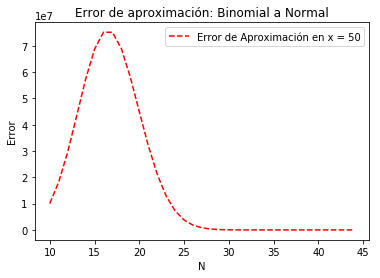

In [16]:
# Cálculo del error de aproximación

p = 0.5
arregloN = np.arange(10., 45., 1.)

def Normal2(x, n):
    mu = n * p
    sigma = np.sqrt(n*p*(1-p))
    return 1/np.sqrt(2*np.pi*sigma**2) * math.e**(-(x-mu)**2/(2*sigma**2))

def Binomial(x, n):
    return scipy.special.binom(x,n) * p**x * (1-p)**(n-x)

def Error(n):
    error = abs(Normal2(50, n) - Binomial(50, n))
    print(error)
    return error
    


plt.figure(10)
plt.title('Error de aproximación: Binomial a Normal')
plt.plot(arregloN, Error(arregloN),'r--', label="Error de Aproximación en x = 50")
plt.legend()
plt.xlabel('N')
plt.ylabel('Error')
plt.show()    


# 2.- Distribuciones Continuas

1.- Es posible utilizar la distribución gamma ya que la restricción del dominio de los datos coincide con el dominio de la distribución gamma. Además, al conocer la media y la varianza, podemos obtener los parámetros necesarios para construir la distribución gamma: 
$$f(x) = x^{k-1}\frac{e^{\frac{-x}{\theta}}}{\theta^k\Gamma(k)},$$
$$E[X] = k\theta $$
$$Var[X] = k\theta^2 $$

Para $x \in (0, \infty)$, $k > 0$, $\theta >0$.

2.- Para una $E[X] = 12$ y $V[X] = 36$, nuestros parámetros son: $k = 4$ y $\theta = 3$. Luego generamos iterativamente muestras de tamaño progresivo hasta que el error en la media sea menor a $10^{-3}$:

Tamaño inicial de la muestra: 50
Tamaño final de la muestra: 4400
(el tamaño fue incrementando en irvetalos de 50)


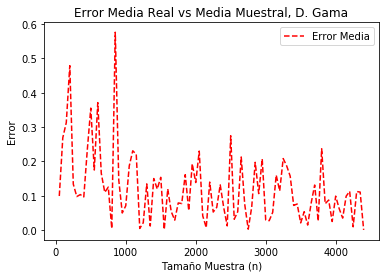

In [44]:
mediaR = 12
mediaM = 0
arregloN = []
error = []
shape = 4
scale = 3
n = 0

np.random.seed(400)

while(abs(mediaR - mediaM) > 10**-3):
    n += 50
    arregloN.append(n)
    distG = np.random.gamma(shape, scale, n)
    mediaM = np.mean(distG)
    error.append(abs(mediaR - mediaM))

print("Tamaño inicial de la muestra: " + str(arregloN[0]))
print("Tamaño final de la muestra: " + str(arregloN[-1]))
print("(el tamaño fue incrementando en irvetalos de 50)")
    
plt.figure(11)
plt.title('Error Media Real vs Media Muestral, D. Gama')
plt.plot(arregloN, error,'r--', label="Error Media")
plt.legend()
plt.xlabel('Tamaño Muestra (n)')
plt.ylabel('Error')
plt.show()    


3.- Finalmente diseñaremos un procedimiento iterativo que buscará el valor de _shape_ $(k)$ bajo el cual la probabilidad de obtener un dato menor que 12 sea $0.4$. Para asegurarnos un error menor a $10^{-3}$ incrementaremos nuestro valor _shape_ en $10^{-4}$ por cada iteración. También mantendremos nuestro parámetro _scale_ $(\theta= 3)$.

In [47]:
from scipy.integrate import quad

np.random.seed(200)

shape = 1
scale = 3
probabilidad = 1
error = 1

valoresS =[]
valoresE = []

def gamma(shape):
    return quad(lambda x: x**(shape-1) * math.e**(-x), 0, np.inf)[0]
     

def low_inc_gamma(s, x):
    return quad(lambda t: t**(s-1) * math.e**(-t), 0, x )[0]

def CDF(x, shape, scale):
    return low_inc_gamma(shape, x/scale) / gamma(shape)

while(error > 10**-3):
    shape += 0.0001
    probabilidad = CDF(12, shape, scale)
    error = abs(0.4 - probabilidad)
    
    valoresS.append(shape)
    valoresE.append(error)
    




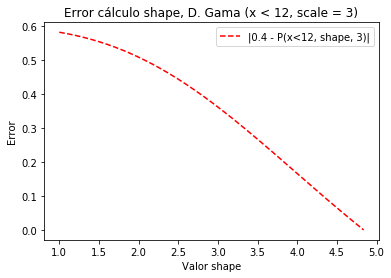

El valor shape resultante es k = 4.8375


In [52]:
plt.figure(12)
plt.title('Error cálculo shape, D. Gama (x < 12, scale = 3)')
plt.plot(valoresS, valoresE,'r--', label="|0.4 - P(x<12, shape, 3)|")
plt.legend()
plt.xlabel('Valor shape')
plt.ylabel('Error')
plt.show()  

print("El valor shape resultante es k = " + str(round(shape,4)))

# 3.- Distribuciones Multivariadas

# 4.- Conclusiones

* La distribución Binomial puede aproximarse a la distribución Normal y a la distribución de Poisson dependiendo de los valores de la probabilidad de éxito $p$ y la cantidad de ensayos $n$.

* Aumentar el tamaño de la muestra nos permite ver cómo la convergencia anterior se cumple claramente.

* El error en la aproximación anterior es del orden de $10^{-7}$ al realizar una cantidad de ensayos $n\geq 45$, el cuál es prácticamente nada.

* Al tomar una muestra de datos de una cierta distribución, un tamaño mayor de muestra tiende a reducir el error entre las medidas de varianza y esperanza de la muestra y sus valores teóricos.
